# MOM Elastic_Net

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from momAPI.procedure.random_data import *
from momAPI.Linear_models.MOM_ElasticNet import mom_elasticnet

momAPI package
In nn __init__
In procedure __init__
In Cross_validation __init__
In procedure __init__
In Cross_validation __init__
In Linear_models __init__


In [2]:
plt.style.use('seaborn-darkgrid')

### Test without outliers

<IPython.core.display.Javascript object>


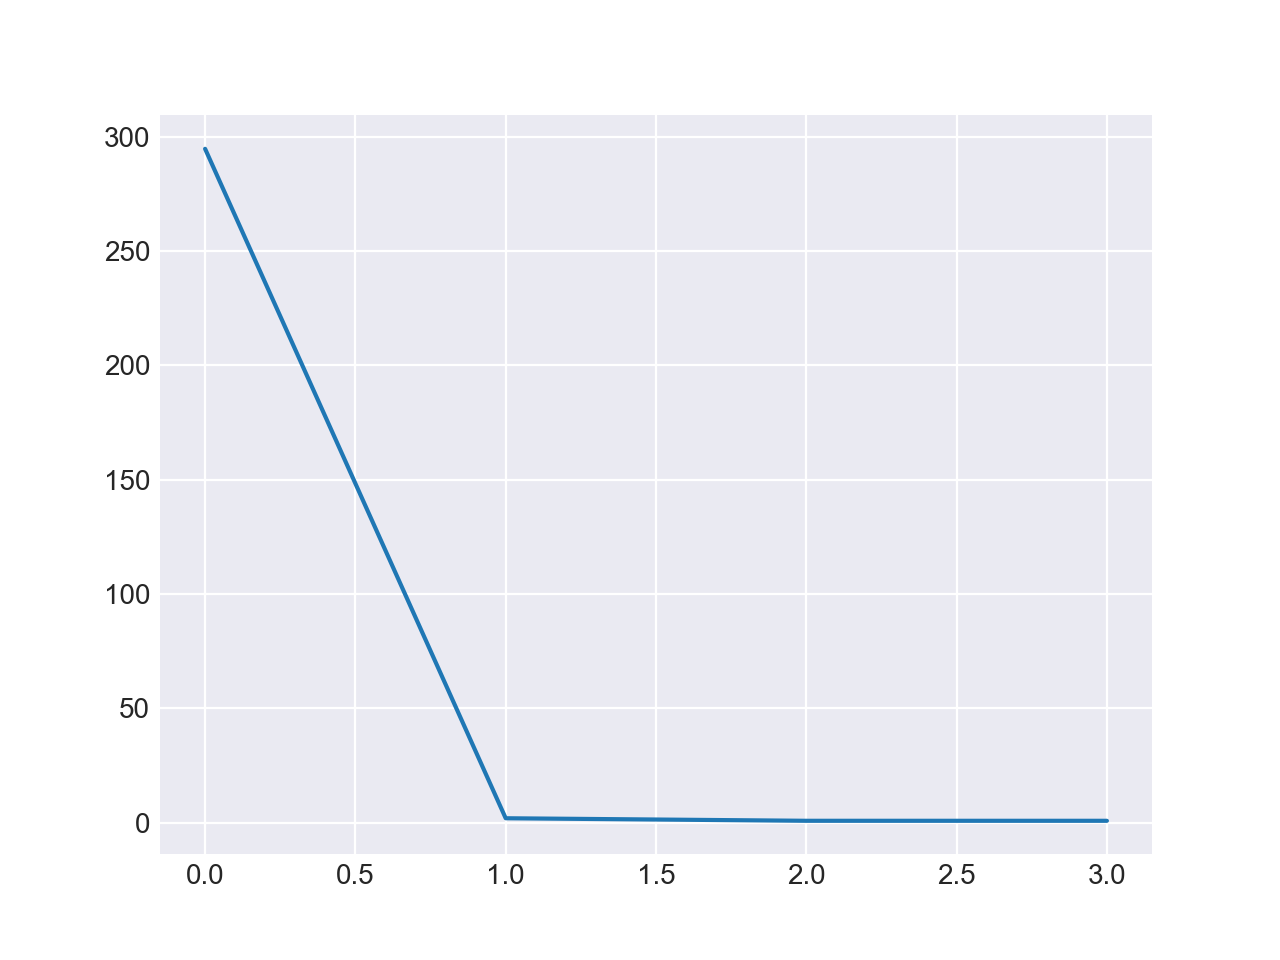

0.9966602626420217

In [3]:
n_samples = 10000
t = create_t_0(50 , 10)
sigma = 1

Y , X = data1(n_samples , t , sigma)

reg = mom_elasticnet()
reg.fit(X,Y.flatten())

%matplotlib notebook
plt.plot(reg.Loss)
plt.show()

reg.score(X,Y)

<IPython.core.display.Javascript object>


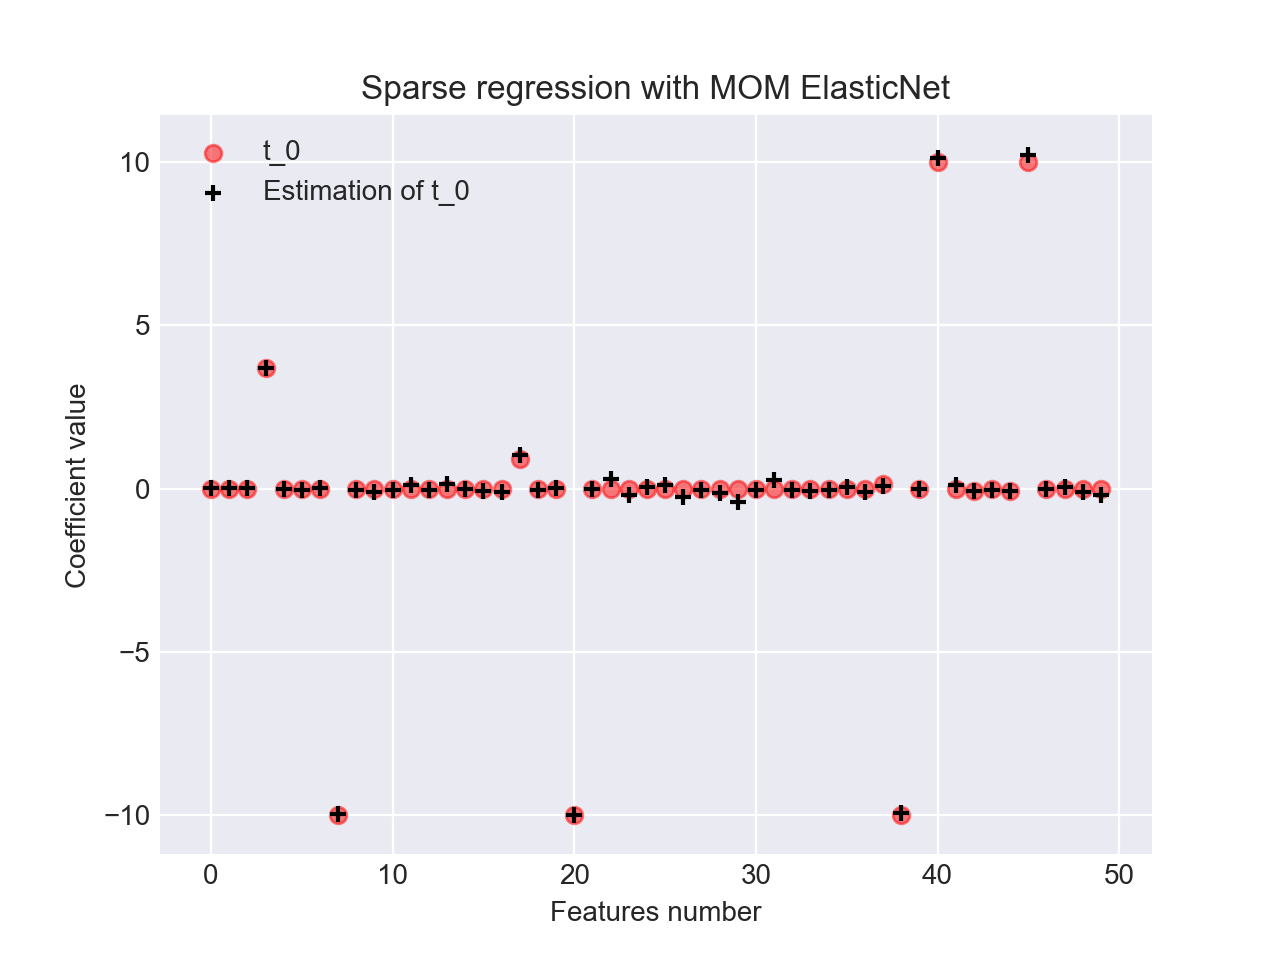

Text(0.5, 1.0, 'Sparse regression with MOM ElasticNet')

In [4]:
%matplotlib notebook
plt.scatter(np.arange(50) , t , color = 'red' , alpha = 0.5 , label = "t_0")
plt.scatter(np.arange(50) , reg.w , color = "black" , marker = "+" , label = "Estimation of t_0")
plt.legend()
plt.xlabel("Features number")
plt.ylabel("Coefficient value")
plt.title('Sparse regression with MOM ElasticNet')

### Test with outliers

(20000,) (100,)


<IPython.core.display.Javascript object>


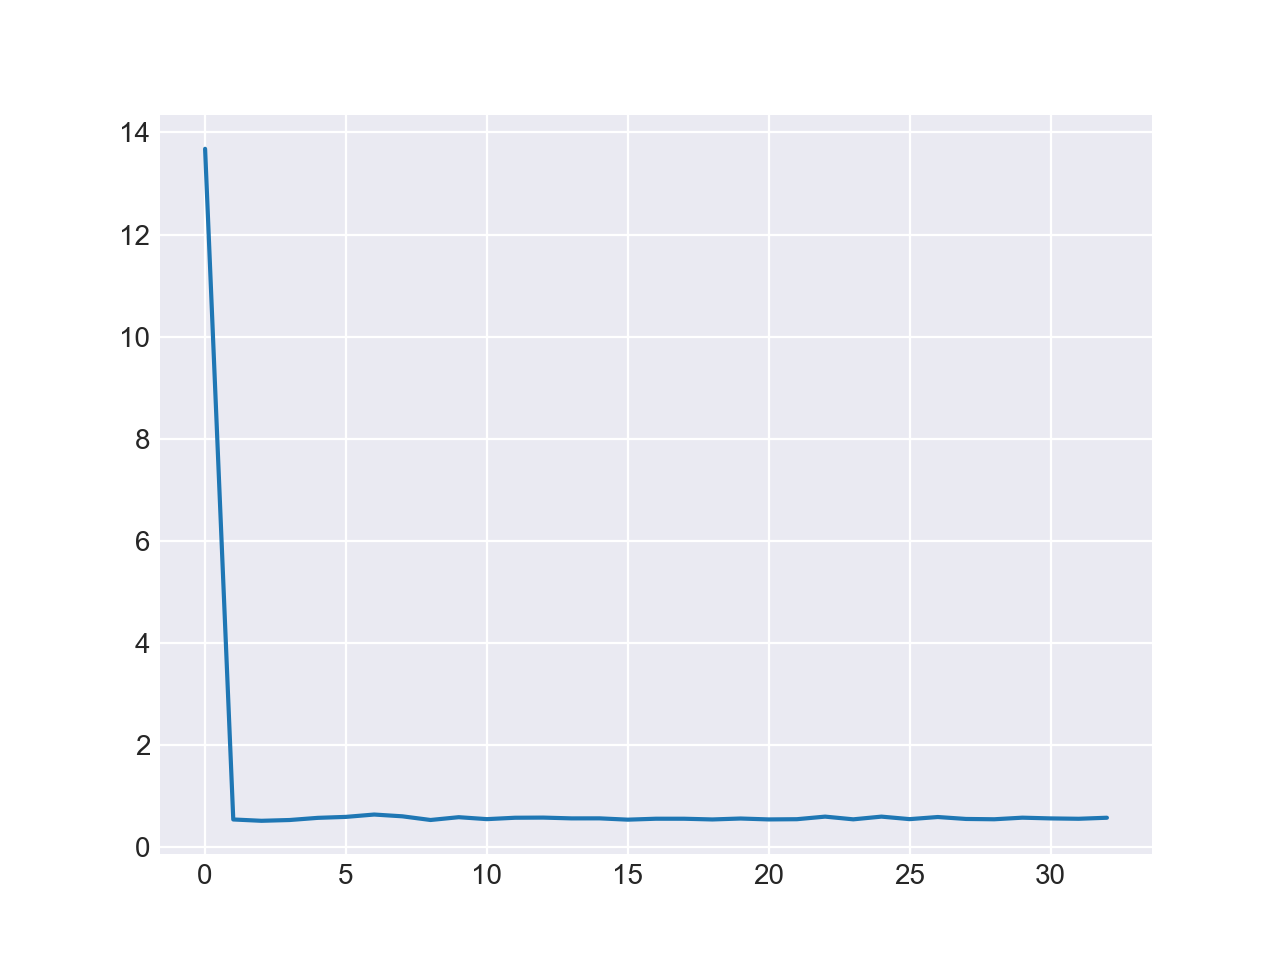

In [5]:
n_samples = 20000
cov1 = np.identity((3))
cov2 = np.array([2.5, 1., -0.8, 1., 0.5, 0.0, -0.8, 0.0, 7.6]).reshape((3,3))
t = np.array([2.,1.,-4.])
sigma = 1

Y1,X1 = data1(n_samples , t , sigma)

n_heavy_tail = 100
Y2,X2 = data3(n_heavy_tail,t)

n_outliers1 = 100
Y3,X3 = data2(n_outliers1, 3, type_outliers = 1)

n_outliers2 = 5
Y4,X4 = data2(n_outliers2, 3, type_outliers = 2)

print(Y1.shape,Y2.shape)
Y5,X5 = data_merge(Y1,X1,Y2,X2)

Y6,X6 = data_merge(Y5,X5,Y3,X3)

Y,X = data_merge(Y6,X6,Y4,X4)

reg = mom_elasticnet(rho = 0.2, Lambda = 0.0, K = 15, random_state = True, max_iter = 50, tol = 10**-4)
reg.fit(X,Y)

%matplotlib notebook
plt.plot(reg.Loss)
plt.show()

<IPython.core.display.Javascript object>


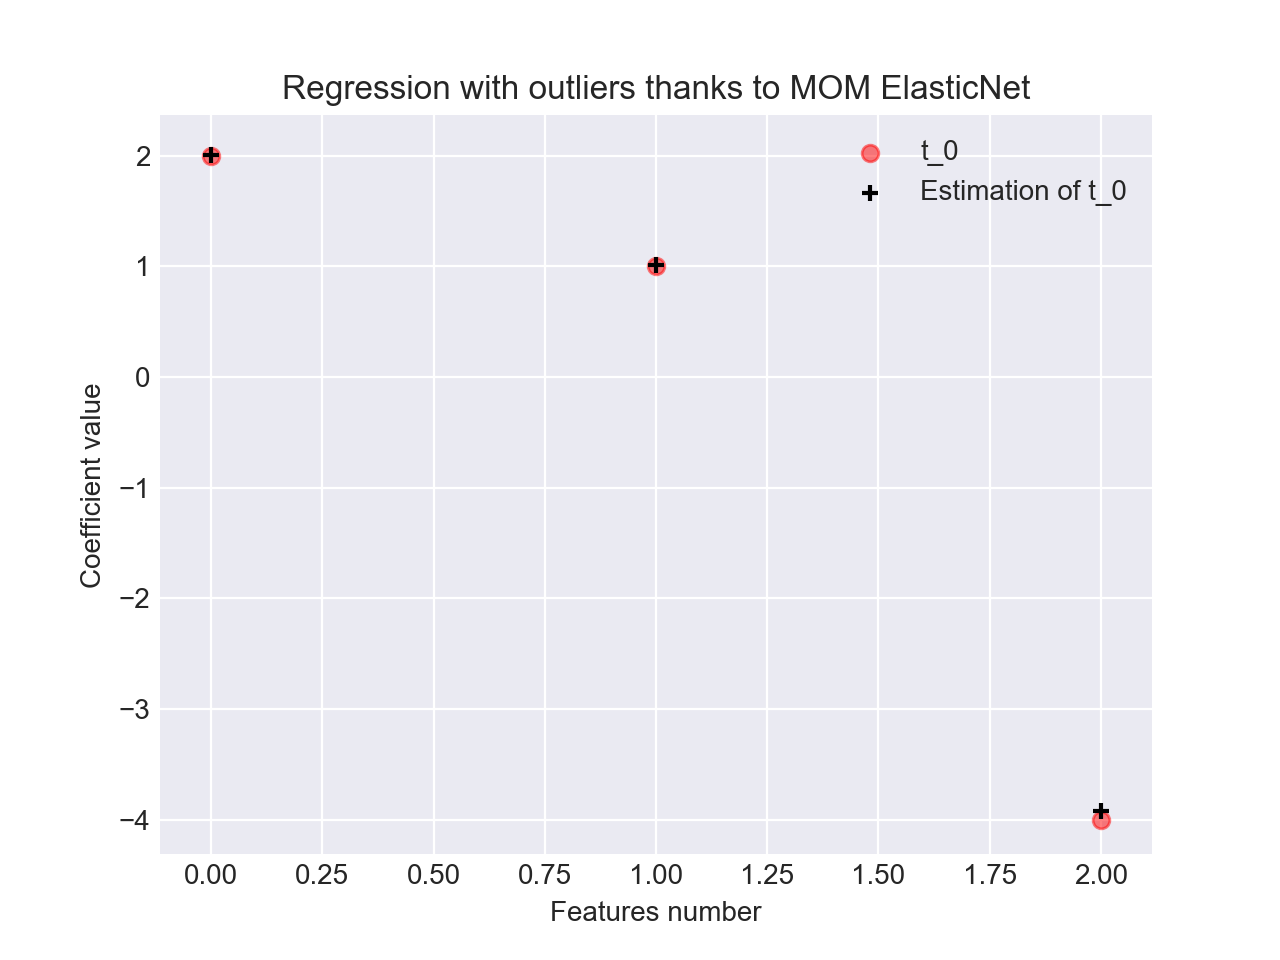

Text(0.5, 1.0, 'Regression with outliers thanks to MOM ElasticNet')

In [6]:
%matplotlib notebook
plt.scatter(np.arange(3) , t , color = 'red' , alpha = 0.5 , label = "t_0")
plt.scatter(np.arange(3) , reg.w , color = "black" , marker = "+" , label = 'Estimation of t_0')
plt.legend()
plt.xlabel("Features number")
plt.ylabel("Coefficient value")
plt.title('Regression with outliers thanks to MOM ElasticNet')

### Test de l'algorithme de descente de coordonnées / Sparsity

<IPython.core.display.Javascript object>


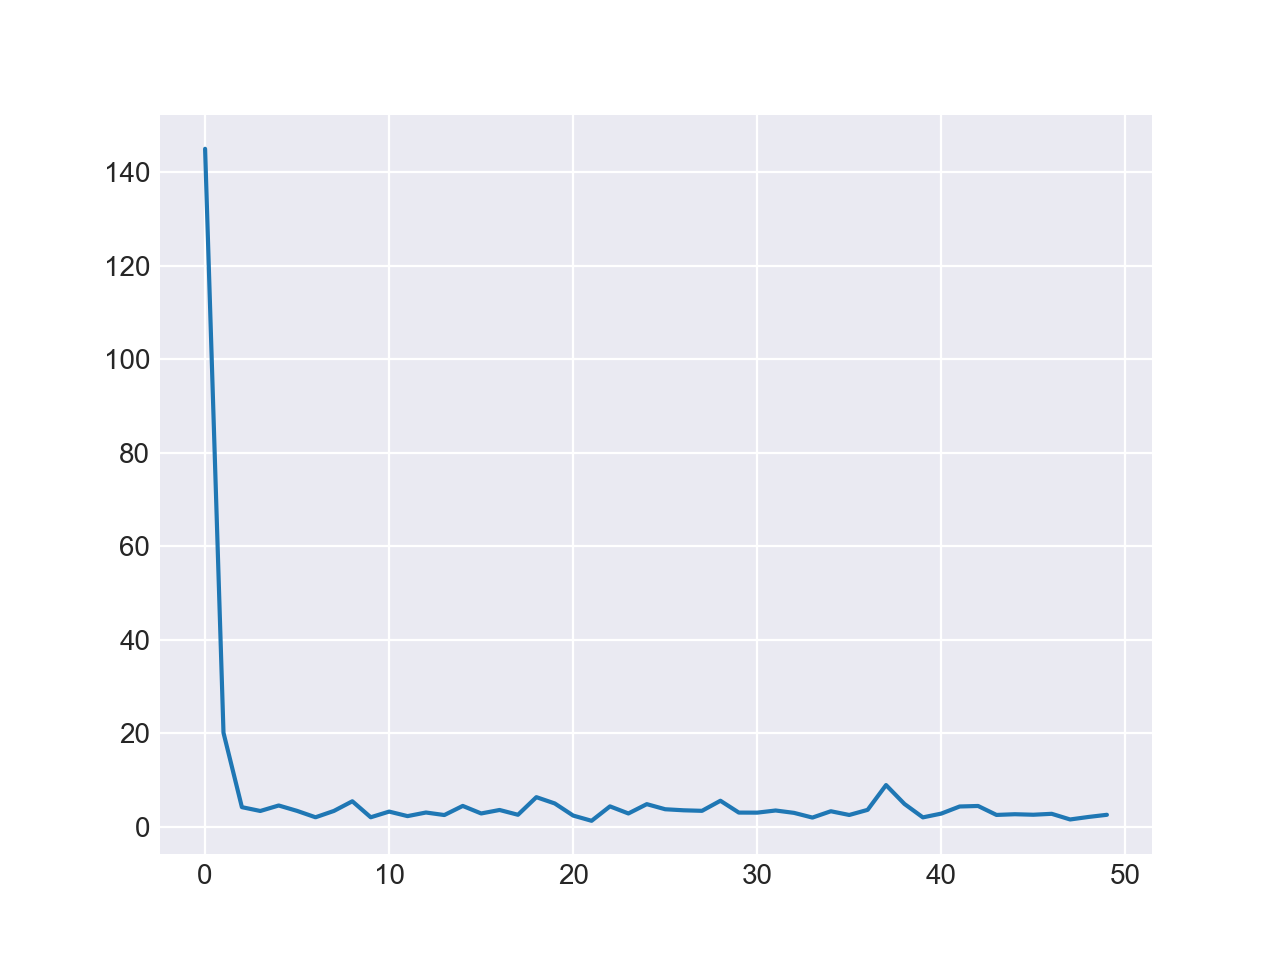

0.974598156743668

In [10]:
n_samples = 5000
cov1 = np.identity((50))
t = create_t_0(50,5)
sigma = 0.1
Y1,X1 = data1(n_samples , t , sigma)

n_heavy_tail = 10
Y2,X2 = data3(n_heavy_tail,t)

n_outliers1 = 20
Y3,X3 = data2(n_outliers1, 50, type_outliers = 1)

n_outliers2 = 4
Y4,X4 = data2(n_outliers2, 50, type_outliers = 2)

Y5,X5 = data_merge(Y1,X1,Y2,X2)
Y6,X6 = data_merge(Y5,X5,Y3,X3)

Y,X = data_merge(Y6,X6,Y4,X4)

reg = mom_elasticnet(rho = 1, Lambda = 0.01, K = 15, random_state = True, max_iter = 50, tol = 10**-4)
reg.fit(X,Y)

%matplotlib notebook
plt.plot(np.arange(reg.Loss.shape[0]),reg.Loss)
plt.show()

reg.score(X1,Y1)

<IPython.core.display.Javascript object>


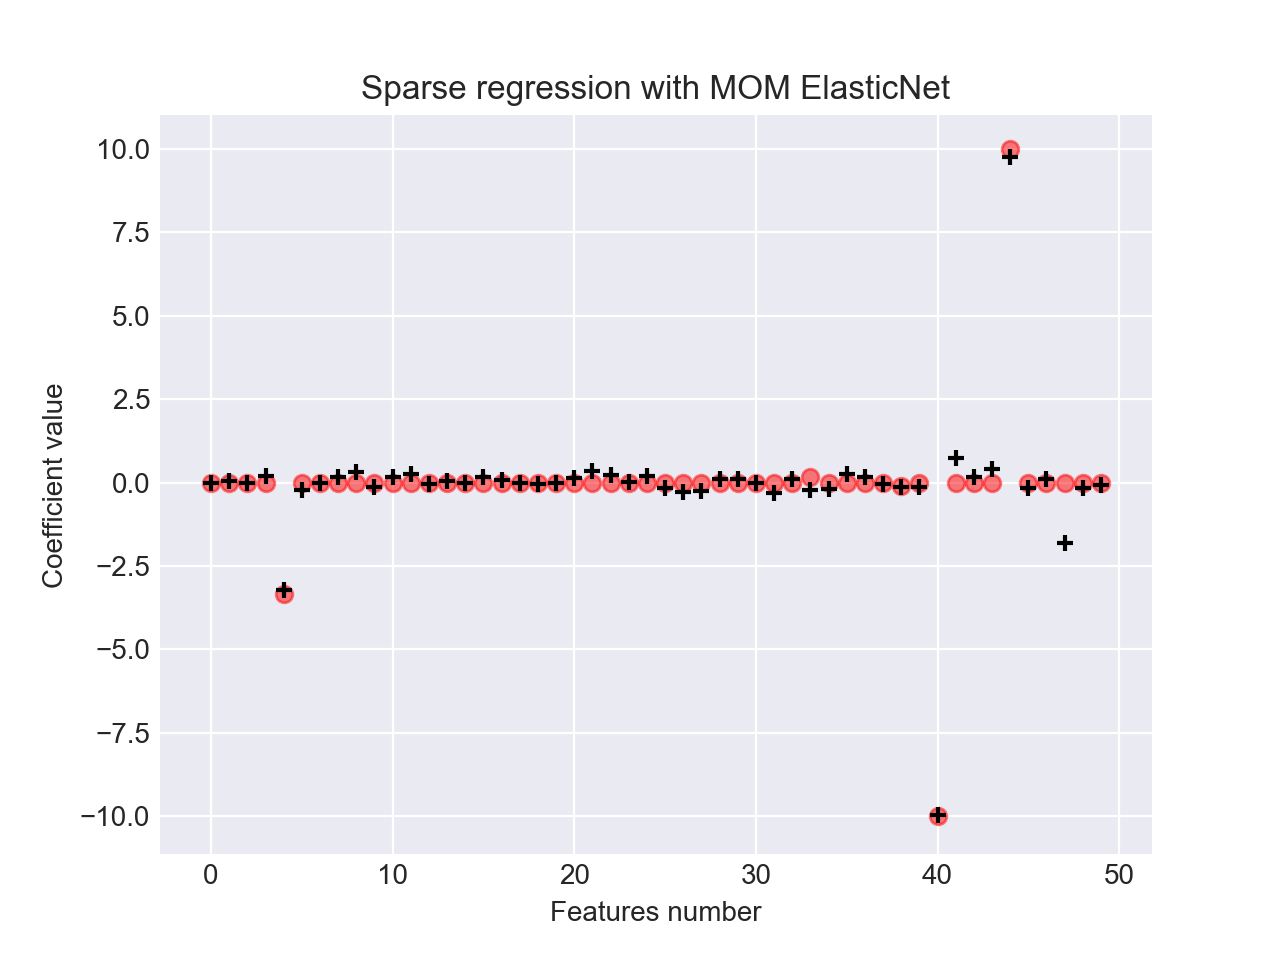

Text(0.5, 1.0, 'Sparse regression with MOM ElasticNet')

In [12]:
%matplotlib notebook
plt.scatter(np.arange(50) , t , color = 'red' , alpha = 0.5 , label = "t_0")
plt.scatter(np.arange(50) , reg.w , color = "black" , marker = "+" , label = "Estimation of t_0")
plt.xlabel("Features number")
plt.ylabel("Coefficient value")
plt.title('Sparse regression with MOM ElasticNet')